# Eindhoven Data Science MeetUp
# Unsupervised learning
This iPython notebook serves as a guide for the Unsupervised Learning meetup on 17 November held at TUe

In [1]:
from matplotlib import pylab
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import pickle

In [2]:
final_embeddings = np.load('embedding.npy')
reverse_dictionary = pickle.load(open('rev_dict.p','rb'))

In [3]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

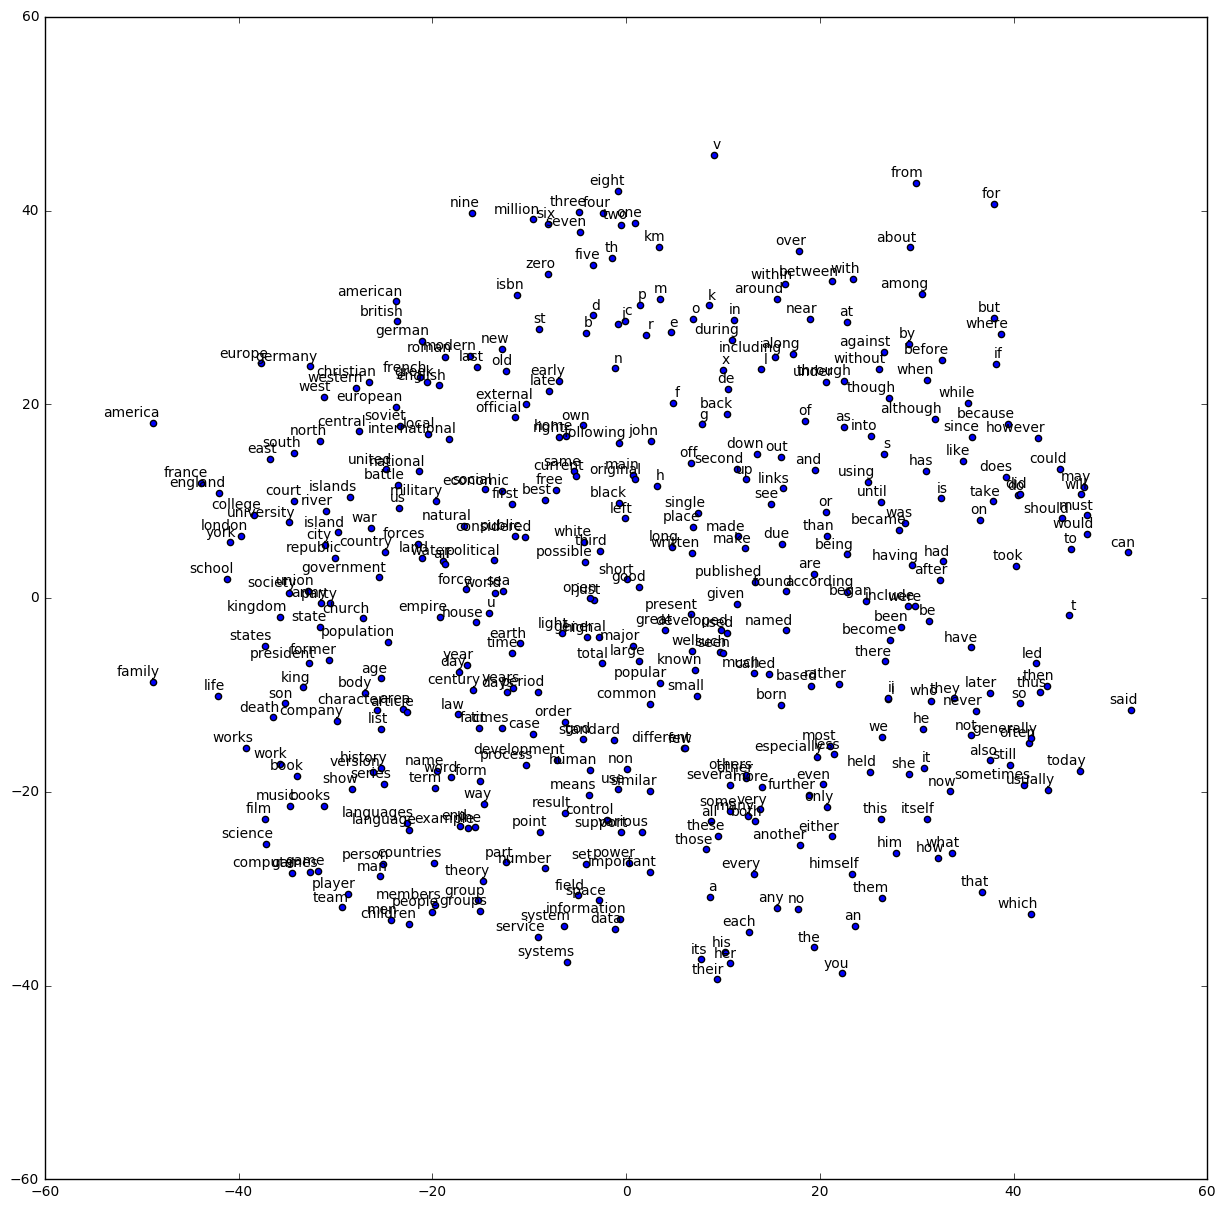

In [4]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [reverse_dictionary[i] for i in xrange(1, num_points+1)]
plot(two_d_embeddings, words)

In [6]:
reverse_dictionary.shape
final_embeddings.shape

(50000, 128)